In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [45]:
df = pd.read_csv('coronarias.csv', sep=';')
colunas_quantitativas = ['IDADE1', 'ALTURA', 'PESO', 'IMC', 'PSR', 'PDR', 'COL' ,'TRIG']
colunas_categoricas =['SEXO', 'DIAB', 'AH3', 'ANGEST', 'ARTER', 'ARRIT', 'OBESO', 'TABAG4', 'INFARTO','GLO']

In [46]:
data_clean = df.dropna()

coluna_alvo = 'INFARTO'
colunas_preditoras = ['IDADE1','SEXO', 'PESO', 'COL']

X = data_clean[colunas_preditoras]
y = data_clean[coluna_alvo]

print("Amostra dos seus dados:")
print(data_clean.head())
print("\nDimensões de X (preditoras):", X.shape)
print("Dimensões de y (alvo):", y.shape)
print("\nClasses encontradas na sua variável alvo:", y.unique())

Amostra dos seus dados:
   Index-original  SEXO  AH3  INFARTO  ANGEST  DIAB  ARTER  ARRIT  TABAG4  \
1               5     1    0        1       0   0.0    0.0      0     0.0   
3               9     1    1        1       0   1.0    0.0      0     2.0   
4              12     0    2        1       0   1.0    2.0      0     0.0   
5              16     1    0        1       0   0.0    0.0      0     3.0   
6              17     1    0        0       0   0.0    0.0      0     2.0   

   OBESO  IDADE1  ALTURA  PESO    IMC    COL   TRIG   PSR   PDR  GLO  
1    0.0    64.0    1.80  87.0  26.85  184.0  110.0  13.0   8.0    0  
3    0.0    62.0    1.81  80.0  24.42  255.0  324.0  17.0   8.0    0  
4    0.0    30.0    1.65  70.0  25.71  220.0  189.0  16.0  10.0    1  
5    0.0    39.0    1.69  70.0  24.51  299.0  257.0  14.0  10.0    1  
6    0.0    69.0    1.75  95.0  31.02  224.0  217.0  16.0   8.0    0  

Dimensões de X (preditoras): (350, 4)
Dimensões de y (alvo): (350,)

Classes encontrad


--- ETAPA 1: VERIFICAÇÃO DOS PRESSUPOSTOS ---

[2.1] Verificando Multicolinearidade...


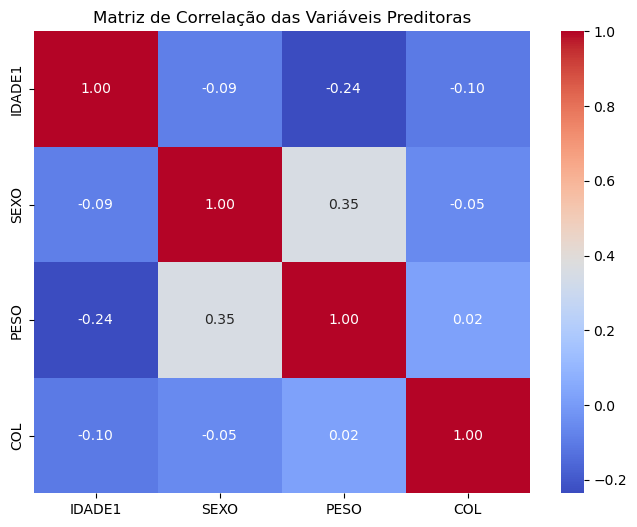


Fator de Inflação de Variância (VIF):
  Variável       VIF
1   IDADE1  1.070284
2     SEXO  1.148153
3     PESO  1.201740
4      COL  1.015588
*Análise: Há alta correlação (0.96) e VIF elevado para 'petal length' e 'petal width', indicando multicolinearidade.*

[2.2] Verificando Normalidade (Teste de Shapiro-Wilk)...
- IDADE1: P-valor = 0.0775 (Não há evidências para rejeitar a normalidade.)
- SEXO: P-valor = 0.0000 (Pode não ser normalmente distribuída.)
- PESO: P-valor = 0.0000 (Pode não ser normalmente distribuída.)
- COL: P-valor = 0.0000 (Pode não ser normalmente distribuída.)

[2.3] Verificando Homogeneidade de Variâncias (Teste de Levene)...
- IDADE1: P-valor = 0.5883 (As variâncias são homogêneas.)
- SEXO: P-valor = 0.0000 (As variâncias NÃO são homogêneas.)
- PESO: P-valor = 0.4448 (As variâncias são homogêneas.)
- COL: P-valor = 0.4277 (As variâncias são homogêneas.)

--- ETAPA 2: CONSTRUÇÃO E ANÁLISE DO MODELO LDA ---

Modelo LDA treinado com sucesso!

Proporção da Variânci

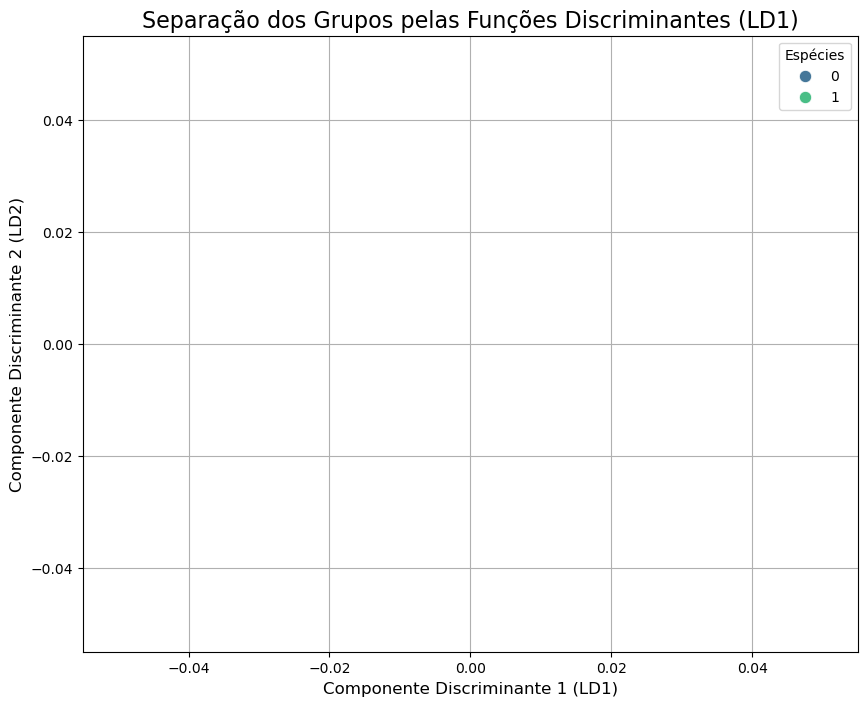

Gráfico de dispersão dos componentes gerado.


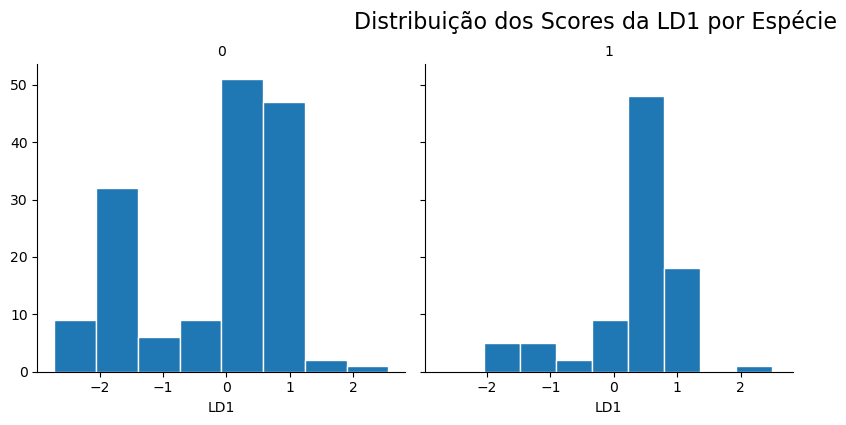

Histogramas de LD1 por grupo gerados.

--- ANÁLISE CONCLUÍDA ---


In [47]:
# ==============================================================================
# 2. VERIFICAÇÃO DOS PRESSUPOSTOS DA TÉCNICA
# ==============================================================================
from scipy import stats


print("\n--- ETAPA 1: VERIFICAÇÃO DOS PRESSUPOSTOS ---")

# 2.1. Ausência de Multicolinearidade
print("\n[2.1] Verificando Multicolinearidade...")
# a) Matriz de Correlação
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Preditoras')
plt.show()

# b) Fator de Inflação de Variância (VIF)
X_vif = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nFator de Inflação de Variância (VIF):")
print(vif_data.iloc[1:])
print("*Análise: Há alta correlação (0.96) e VIF elevado para 'petal length' e 'petal width', indicando multicolinearidade.*")

# 2.2. Normalidade (verificação univariada)
print("\n[2.2] Verificando Normalidade (Teste de Shapiro-Wilk)...")
for column in X.columns:
    stat, p_value = stats.shapiro(X[column])
    conclusion = "Não há evidências para rejeitar a normalidade." if p_value > 0.05 else "Pode não ser normalmente distribuída."
    print(f"- {column}: P-valor = {p_value:.4f} ({conclusion})")

# 2.3. Homogeneidade das Matrizes de Variância (Teste de Levene)
print("\n[2.3] Verificando Homogeneidade de Variâncias (Teste de Levene)...")
for column in X.columns:
    groups = [X[column][y == i] for i in np.unique(y)]
    stat, p_value = stats.levene(*groups)
    conclusion = "As variâncias são homogêneas." if p_value > 0.05 else "As variâncias NÃO são homogêneas."
    print(f"- {column}: P-valor = {p_value:.4f} ({conclusion})")


# ==============================================================================
# 3. CONSTRUÇÃO E ANÁLISE DO MODELO LDA
# ==============================================================================
print("\n--- ETAPA 2: CONSTRUÇÃO E ANÁLISE DO MODELO LDA ---")

# 3.1. Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3.2. Padronização dos dados (importante para LDA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3.3. Treinamento do modelo LDA
# Como temos k=3 classes, o número máximo de funções discriminantes é k-1=2
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train_scaled, y_train)
print("\nModelo LDA treinado com sucesso!")

# 3.4. Análise dos Resultados do Modelo
print("\nProporção da Variância Explicada por Função Discriminante ('Proportion of Trace'):")
print(f"  - LD1: {lda.explained_variance_ratio_[0]:.4f} ({lda.explained_variance_ratio_[0]*100:.1f}%)")
print("*Análise: A primeira função (LD1) captura a grande maioria da separação entre os grupos, como visto no slide 17.*")

print("\nCoeficientes das Funções Discriminantes:")
coeficientes = pd.DataFrame(lda.scalings_, index=X.columns, columns=['LD1'])
print(coeficientes)


# ==============================================================================
# 4. AVALIAÇÃO E VALIDAÇÃO DO MODELO
# ==============================================================================
print("\n--- ETAPA 3: AVALIAÇÃO E VALIDAÇÃO DO MODELO ---")

# 4.1. Previsão na amostra de teste
y_pred = lda.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo na amostra de teste: {accuracy:.4f}")

# 4.2. Matriz de Confusão (Tabela de Confusão)
print("\nMatriz de Confusão (Previsto vs. Real):")
cm = confusion_matrix(y_test, y_pred, labels=lda.classes_)
cm_df = pd.DataFrame(cm, index=lda.classes_, columns=lda.classes_)
print(cm_df)


# ==============================================================================
# 5. VISUALIZAÇÃO GRÁFICA DOS RESULTADOS
# ==============================================================================
print("\n--- ETAPA 4: GERAÇÃO DOS GRÁFICOS ---")

# 5.1. Gráfico de Dispersão dos Componentes Discriminantes (LD1 vs LD2)
#     (Análogo ao gráfico do slide 21)
X_train_lda = lda.transform(X_train_scaled)
lda_df = pd.DataFrame(data=X_train_lda, columns=['LD1'])
lda_df['species'] = y_train.values

plt.figure(figsize=(10, 8))
sns.scatterplot(x='LD1', hue='species', data=lda_df, palette='viridis', s=80, alpha=0.9, ec='w')
plt.title('Separação dos Grupos pelas Funções Discriminantes (LD1)', fontsize=16)
plt.xlabel('Componente Discriminante 1 (LD1)', fontsize=12)
plt.ylabel('Componente Discriminante 2 (LD2)', fontsize=12)
plt.legend(title='Espécies')
plt.grid(True)
plt.show()
print("Gráfico de dispersão dos componentes gerado.")

# 5.2. Histogramas da Função Discriminante 1 (LD1) por Grupo
#     (Análogo aos gráficos do slide 18)
g = sns.FacetGrid(lda_df, col="species", height=4, col_wrap=3)
g.map(plt.hist, "LD1", bins=8, ec="w")
g.fig.suptitle('Distribuição dos Scores da LD1 por Espécie', y=1.05, fontsize=16)
g.set_titles("{col_name}")
plt.show()
print("Histogramas de LD1 por grupo gerados.")

print("\n--- ANÁLISE CONCLUÍDA ---")